<a href="https://colab.research.google.com/github/rubina-sultana/Technical-Analysis-OHLC/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/YF-GSPTSE.csv")
df.head()

,Unnamed: 0,ticker,date,close,raw_close,high,low,open,volume
0,0,^GSPTSE,2002-12-02,6665.299805,6665.299805,6671.100098,6570.399902,6652.000000,1.998330e+10
1,1,^GSPTSE,2002-12-03,6640.600098,6640.600098,6665.299805,6614.299805,6639.200195,2.075676e+10
2,2,^GSPTSE,2002-12-04,6610.399902,6610.399902,6640.600098,6570.700195,6611.399902,1.790447e+10
3,3,^GSPTSE,2002-12-05,6542.000000,6542.000000,6651.899902,6532.700195,6610.399902,1.552826e+10
4,4,^GSPTSE,2002-12-06,6577.200195,6577.200195,6594.899902,6491.799805,6501.100098,1.496896e+10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     4815 non-null   object 
 1   date       4815 non-null   object 
 2   close      4815 non-null   float64
 3   raw_close  4815 non-null   float64
 4   high       4815 non-null   float64
 5   low        4815 non-null   float64
 6   open       4815 non-null   float64
 7   volume     4815 non-null   float64
dtypes: float64(6), object(2)
memory usage: 301.1+ KB


In [ ]:
df.describe()

,close,raw_close,high,low,open,volume
count,4815.000000,4815.000000,4815.000000,4815.000000,4815.000000,4.815000e+03
mean,13185.512178,13185.512178,13250.873706,13113.555220,13187.770302,1.939185e+10
std,3084.102479,3084.102479,3084.563223,3081.829121,3083.541472,7.787511e+09
min,6228.600098,6228.600098,6298.399902,6204.899902,6265.299805,0.000000e+00
25%,11584.200195,11584.200195,11663.850098,11497.100098,11596.149902,1.517020e+10
50%,13318.000000,13318.000000,13379.900391,13237.900391,13313.900391,1.895798e+10
75%,15201.449707,15201.449707,15257.150391,15135.649902,15201.450195,2.281104e+10
max,21774.189453,21774.189453,21796.199219,21697.699219,21758.099609,9.440374e+10


In [ ]:
print(df.dtypes)

ticker        object
date          object
close        float64
raw_close    float64
high         float64
low          float64
open         float64
volume       float64
dtype: object


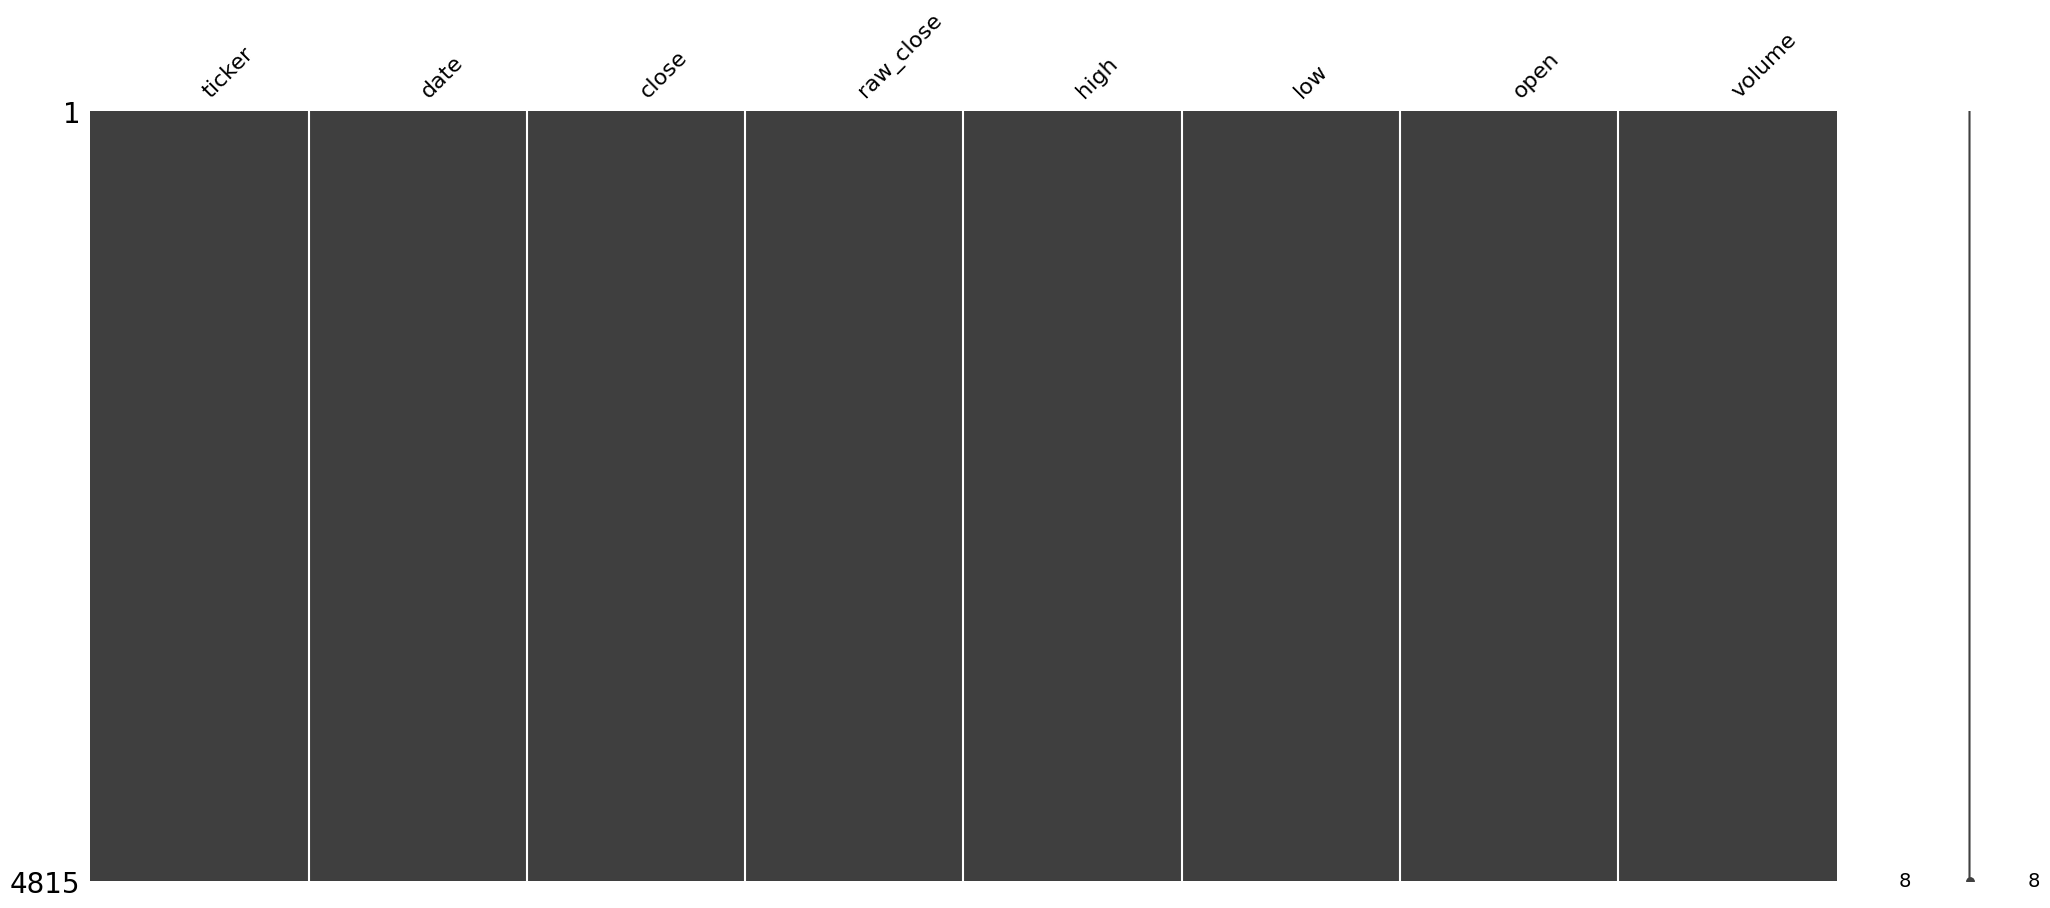

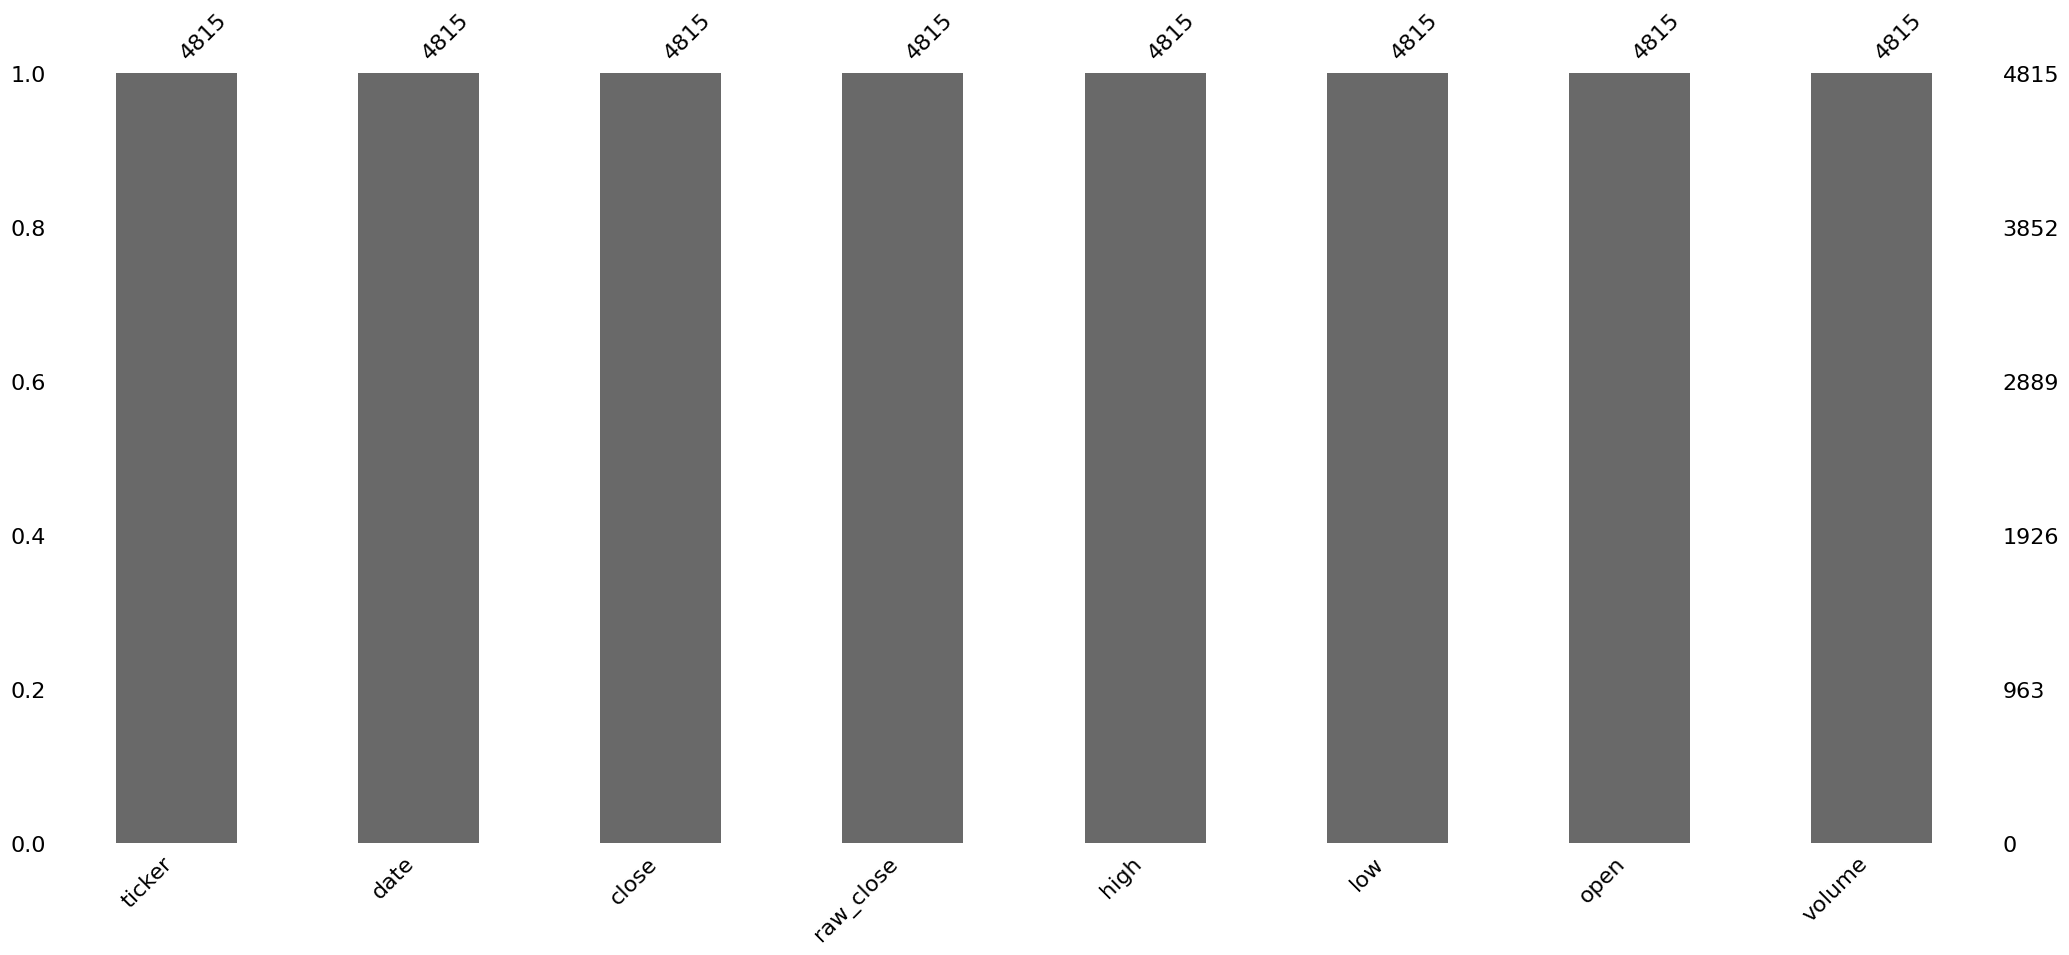

In [ ]:
%matplotlib inline
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Read the CSV file into a DataFrame
#df = pd.read_csv("/content/drive/MyDrive/archive (5)/stock_details_5_years.csv")

# Plot a matrix of missing values
msno.matrix(df)
plt.show()

# Plot a bar chart of missing values
msno.bar(df)
plt.show()

# Plot a heatmap of missing values
#msno.heatmap(df)
#plt.show()


In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe()

,close,raw_close,high,low,open,volume
count,4815.000000,4815.000000,4815.000000,4815.000000,4815.000000,4.815000e+03
mean,13185.512178,13185.512178,13250.873706,13113.555220,13187.770302,1.939185e+10
std,3084.102479,3084.102479,3084.563223,3081.829121,3083.541472,7.787511e+09
min,6228.600098,6228.600098,6298.399902,6204.899902,6265.299805,0.000000e+00
25%,11584.200195,11584.200195,11663.850098,11497.100098,11596.149902,1.517020e+10
50%,13318.000000,13318.000000,13379.900391,13237.900391,13313.900391,1.895798e+10
75%,15201.449707,15201.449707,15257.150391,15135.649902,15201.450195,2.281104e+10
max,21774.189453,21774.189453,21796.199219,21697.699219,21758.099609,9.440374e+10


In [ ]:
!pip install plotly.express

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
fig=px.box(df,y='open')
fig1=px.box(df,y='close')
fig2=px.box(df,y='high')
fig3=px.box(df,y='low')
fig1.show()
fig2.show()
fig3.show()
fig.show()

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
fig4=px.box(df,y='volume')
fig4.show()

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
fig4=px.box(df,y='raw_close')
fig4.show()

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
fig4=px.box(df,y='date')
fig4.show()

In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
outliers = find_outliers_IQR(df['volume'])

print(outliers)
print(len(outliers))
print(outliers.min())
print(outliers.max())

16      2.935230e+09
32      1.168700e+08
52      1.043200e+08
120     9.408000e+07
148     7.270000e+07
            ...     
4771    6.397440e+10
4780    3.567581e+10
4784    4.810626e+10
4807    3.954336e+10
4814    1.819605e+08
Name: volume, Length: 260, dtype: float64
260
0.0
94403740000.0


In [ ]:
outliers = find_outliers_IQR(df[['volume']])

outliers

,volume
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4810,NaN
4811,NaN
4812,NaN
4813,NaN


In [ ]:
def drop_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   outliers_dropped = outliers.dropna().reset_index()

   return outliers_dropped

In [ ]:
import numpy as np
upper_limit = df['volume'].mean() + 3*df['volume'].std()

print(upper_limit)

lower_limit = df['volume'].mean() - 3*df['volume'].std()

print(lower_limit)



df['volume'] = np.where(df['volume'] > upper_limit,

   upper_limit,

   np.where(

       df['volume'] < lower_limit,

       lower_limit,

       df['volume']

   )

)

42754388122.33983
-3970680196.8951836


In [ ]:
df.describe()[['volume']]

,volume
count,4.815000e+03
mean,1.923521e+10
std,7.067022e+09
min,0.000000e+00
25%,1.517020e+10
50%,1.895798e+10
75%,2.281104e+10
max,4.275439e+10


In [ ]:
def impute_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   upper = df[~(df>(q3+1.5*IQR))].max()

   lower = df[~(df<(q1-1.5*IQR))].min()

   df = np.where(df > upper,

       df.mean(),

       np.where(

           df < lower,

           df.mean(),

           df

           )

       )

   return df

In [ ]:
df['volume'] = impute_outliers_IQR(df['volume'])

df.describe()['volume']

count    4.815000e+03
mean     1.908805e+10
std      5.309591e+09
min      3.785510e+09
25%      1.559414e+10
50%      1.923521e+10
75%      2.228904e+10
max      3.420722e+10
Name: volume, dtype: float64

In [ ]:
!pip install python-dateutil

In [ ]:
# Import pandas and datetime libraries
import pandas as pd
import datetime as dt

# Read the data from a csv file
data = pd.read_csv("/content/drive/MyDrive/YF-GSPTSE.csv")

# Convert the Date column to datetime objects
data["date"] = pd.to_datetime(data["date"], utc=True)

# Convert the Date column to a common format (YYYY-MM-DD)
data["date"] = data["date"].dt.strftime("%Y-%m-%d")

# Save the modified data to a new csv file
data.to_csv("/content/drive/MyDrive/YF-GSPTSE.csv")

# Print the first five rows of the modified data
print(data.head())


    ticker        date        close    raw_close         high          low  \
0  ^GSPTSE  2002-12-02  6665.299805  6665.299805  6671.100098  6570.399902   
1  ^GSPTSE  2002-12-03  6640.600098  6640.600098  6665.299805  6614.299805   
2  ^GSPTSE  2002-12-04  6610.399902  6610.399902  6640.600098  6570.700195   
3  ^GSPTSE  2002-12-05  6542.000000  6542.000000  6651.899902  6532.700195   
4  ^GSPTSE  2002-12-06  6577.200195  6577.200195  6594.899902  6491.799805   

          open        volume  
0  6652.000000  1.998330e+10  
1  6639.200195  2.075676e+10  
2  6611.399902  1.790447e+10  
3  6610.399902  1.552826e+10  
4  6501.100098  1.496896e+10  


In [ ]:
import pandas as pd

# Your OHLC data
#data = {
    #'Open': [43.829761, 104.769074, 54.176498, 83.749496, 39.692784],
    #'High': [43.863354, 105.519257, 55.007500, 84.499496, 40.064904],
    #'Low': [42.639594, 103.534595, 54.099998, 82.616501, 38.735195],
    #'Close': [43.083508, 104.636131, 54.729000, 83.678497, 39.037853]
#}

# Convert to DataFrame
data=pd.read_csv("/content/drive/MyDrive/YF-GSPTSE.csv")
df = pd.DataFrame(data)

# Calculate SMA
window_size = 3  # Example window size
df['SMA'] = df['close'].rolling(window=window_size).mean()

# Calculate Bollinger Bands
df['Middle Band'] = df['SMA']
df['Upper Band'] = df['Middle Band'] + 2 * df['close'].rolling(window=window_size).std()
df['Lower Band'] = df['Middle Band'] - 2 * df['close'].rolling(window=window_size).std()

# Calculate RSI
delta = df['close'].diff()
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)
avg_gain = gain.rolling(window=window_size).mean()
avg_loss = loss.rolling(window=window_size).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Display the DataFrame with the calculated indicators
print(df)


      Unnamed: 0   ticker        date         close     raw_close  \
0              0  ^GSPTSE  2002-12-02   6665.299805   6665.299805   
1              1  ^GSPTSE  2002-12-03   6640.600098   6640.600098   
2              2  ^GSPTSE  2002-12-04   6610.399902   6610.399902   
3              3  ^GSPTSE  2002-12-05   6542.000000   6542.000000   
4              4  ^GSPTSE  2002-12-06   6577.200195   6577.200195   
...          ...      ...         ...           ...           ...   
4810        4810  ^GSPTSE  2022-01-27  20555.949219  20555.949219   
4811        4811  ^GSPTSE  2022-01-28  20741.800781  20741.800781   
4812        4812  ^GSPTSE  2022-01-31  21098.300781  21098.300781   
4813        4813  ^GSPTSE  2022-02-01  21319.900391  21319.900391   
4814        4814  ^GSPTSE  2022-02-02  21393.429688  21393.429688   

              high           low          open        volume           SMA  \
0      6671.100098   6570.399902   6652.000000  1.998330e+10           NaN   
1      6665.299

In [ ]:
import pandas as pd

# Your OHLC data
data=pd.read_csv("/content/drive/MyDrive/YF-GSPTSE.csv")

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate daily percentage change
df['ticker'] = (df['close'] - df['open']) / df['open']

# Calculate 5-day rolling volatility
df['volume'] = df['ticker'].rolling(window=5).std()

# Simple price pattern: Bullish Engulfing
df['Bullish Engulfing'] = (df['close'] > df['open']) & (df['close'].shift(1) < df['open'].shift(1)) & (df['open'] < df['close'].shift(1))

# Display the DataFrame with the new features
print(df[['date', 'ticker', 'volume', 'raw_close', 'Bullish Engulfing']])


            date    ticker    volume     raw_close  Bullish Engulfing
0     2002-12-02  0.001999       NaN   6665.299805              False
1     2002-12-03  0.000211       NaN   6640.600098              False
2     2002-12-04 -0.000151       NaN   6610.399902              False
3     2002-12-05 -0.010347       NaN   6542.000000              False
4     2002-12-06  0.011706  0.007839   6577.200195               True
...          ...       ...       ...           ...                ...
4810  2022-01-27 -0.009611  0.012291  20555.949219              False
4811  2022-01-28  0.009864  0.011173  20741.800781               True
4812  2022-01-31  0.018536  0.013397  21098.300781              False
4813  2022-02-01  0.007532  0.012339  21319.900391              False
4814  2022-02-02  0.001414  0.010466  21393.429688              False

[4815 rows x 5 columns]


In [ ]:
!pip install pipeline

In [ ]:
ticker	date	close	raw_close	high	low	open	volume
0	^GSPTSE	2002-12-02	6665.299805	6665.299805	6671.100098	6570.399902	6652.000000	1.998330e+10
1	^GSPTSE	2002-12-03	6640.600098	6640.600098	6665.299805	6614.299805	6639.200195	2.075676e+10
2	^GSPTSE	2002-12-04	6610.399902	6610.399902	6640.600098	6570.700195	6611.399902	1.790447e+10
3	^GSPTSE	2002-12-05	6542.000000	6542.000000	6651.899902	6532.700195	6610.399902	1.552826e+10
4	^GSPTSE	2002-12-06	6577.200195	6577.200195	6594.899902	6491.799805	6501.100098	1.496896e+10

In [ ]:

import unittest

# Assuming 'data' is a list of dictionaries representing the rows of stock data
data = [
    {'date': '2018-11-29 00:00:00-05:00', 'open': 43.829761, 'high': 43.863354, 'low': 42.639594, 'close': 43.083508, 'volume': 167080000, 'raw_close': 0.00,  'ticker': 'AAPL'},
    {'date': '2018-11-29 00:00:00-05:00', 'open': 104.769074, 'high': 105.519257, 'low': 103.534595, 'close': 104.636131, 'volume': 28123200, 'raw_close': 0.00, 'ticker': 'MSFT'},
    {'date': '2018-11-29 00:00:00-05:00', 'open': 54.176498, 'high': 55.007500, 'low': 54.099998, 'close': 54.729000, 'volume': 31004000, 'raw_close': 0.00, 'ticker': 'GOOGL'},
    {'date': '2018-11-29 00:00:00-05:00', 'open': 83.749496, 'high': 84.499496, 'low': 82.616501, 'close': 83.678497, 'volume': 132264000, 'raw_close': 0.00,  'ticker': 'AMZN'}
]

class TestStockData(unittest.TestCase):
    def test_data_integrity(self):
        for entry in data:
            # Check if all required fields are present
            self.assertIn('date', entry)
            self.assertIn('open', entry)
            self.assertIn('high', entry)
            self.assertIn('low', entry)
            self.assertIn('close', entry)
            self.assertIn('volume', entry)
            self.assertIn('raw_close', entry)
            self.assertIn('ticker', entry)

            # Check if the values are of correct type
            self.assertIsInstance(entry['date'], str)
            self.assertIsInstance(entry['open'], float)
            self.assertIsInstance(entry['high'], float)
            self.assertIsInstance(entry['low'], float)
            self.assertIsInstance(entry['close'], float)
            self.assertIsInstance(entry['volume'], int)
            self.assertIsInstance(entry['raw_close'], float)
            self.assertIsInstance(entry['ticker'], str)

            # Check if 'High' is greater than or equal to 'Low'
            self.assertGreaterEqual(entry['high'], entry['low'])

            # Check if 'Open' and 'Close' are within the 'High' and 'Low' range
            self.assertGreaterEqual(entry['high'], entry['open'])
            self.assertGreaterEqual(entry['open'], entry['low'])
            self.assertGreaterEqual(entry['high'], entry['close'])
            self.assertGreaterEqual(entry['close'], entry['low'])

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [ ]:
import pandas as pd

# Sample data
#data = [
    #{'date': '2018-11-29 00:00:00-05:00', 'open': 43.829761, 'high': 43.863354, 'low': 42.639594, 'close': 43.083508, 'volume': 167080000, 'raw_close': 0.00,  'ticker': 'AAPL'},
    #{'date': '2018-11-29 00:00:00-05:00', 'open': 104.769074, 'high': 105.519257, 'low': 103.534595, 'close': 104.636131, 'volume': 28123200, 'raw_close': 0.00, 'ticker': 'MSFT'},
    #{'date': '2018-11-29 00:00:00-05:00', 'open': 54.176498, 'high': 55.007500, 'low': 54.099998, 'close': 54.729000, 'volume': 31004000, 'raw_close': 0.00, 'ticker': 'GOOGL'},
    #{'date': '2018-11-29 00:00:00-05:00', 'open': 83.749496, 'high': 84.499496, 'low': 82.616501, 'close': 83.678497, 'volume': 132264000, 'raw_close': 0.00,  'ticker': 'AMZN'}
#]
#
data=pd.read_csv("/content/drive/MyDrive/YF-GSPTSE.csv")

df = pd.DataFrame(data)

# Function to check for data quality issues
def check_data_quality(df):
    issues = []

    # Check for missing values
    if df.isnull().values.any():
        issues.append("There are missing values in the dataset.")

    # Check for duplicate rows
    if df.duplicated().any():
        issues.append("There are duplicate rows in the dataset.")

    # Check for data type consistency
    for column in ['open', 'high', 'low', 'close', 'volume', 'raw_close']:
        if not pd.api.types.is_numeric_dtype(df[column]):
            issues.append(f"The column {column} has non-numeric values.")

    # Add more checks as needed...

    return issues

# Run the data quality check
quality_issues = check_data_quality(df)
if quality_issues:
    for issue in quality_issues:
        print(issue)
else:
    print("No data quality issues found.")



No data quality issues found.


In [ ]:
import sqlite3
import pandas as pd

# Sample data
#data = [
    #{'date': '2018-11-29 00:00:00-05:00', 'open': 43.829761, 'high': 43.863354, 'low': 42.639594, 'close': 43.083508, 'volume': 167080000, 'raw_close': 0.00,  'ticker': 'AAPL'},
    #{'date': '2018-11-29 00:00:00-05:00', 'open': 104.769074, 'high': 105.519257, 'low': 103.534595, 'close': 104.636131, 'volume': 28123200, 'raw_close': 0.00, 'ticker': 'MSFT'},
    #{'date': '2018-11-29 00:00:00-05:00', 'open': 54.176498, 'high': 55.007500, 'low': 54.099998, 'close': 54.729000, 'volume': 31004000, 'raw_close': 0.00, 'ticker': 'GOOGL'},
    #{'date': '2018-11-29 00:00:00-05:00', 'open': 83.749496, 'high': 84.499496, 'low': 82.616501, 'close': 83.678497, 'volume': 132264000, 'raw_close': 0.00,  'ticker': 'AMZN'}
#]
#
data=pd.read_csv("/content/drive/MyDrive/YF-GSPTSE.csv")


# Convert data to DataFrame
df = pd.DataFrame(data)

# Connect to SQLite database
conn = sqlite3.connect('yfinance_data.db')

# Write records stored in a DataFrame to a SQL database
df.to_sql('yfinance', conn, if_exists='replace', index=False)

# Verify data
query = "SELECT * FROM yfinance"
retrieved_df = pd.read_sql(query, conn)
print(retrieved_df)

# Close the connection
conn.close()


      Unnamed: 0   ticker        date         close     raw_close  \
0              0  ^GSPTSE  2002-12-02   6665.299805   6665.299805   
1              1  ^GSPTSE  2002-12-03   6640.600098   6640.600098   
2              2  ^GSPTSE  2002-12-04   6610.399902   6610.399902   
3              3  ^GSPTSE  2002-12-05   6542.000000   6542.000000   
4              4  ^GSPTSE  2002-12-06   6577.200195   6577.200195   
...          ...      ...         ...           ...           ...   
4810        4810  ^GSPTSE  2022-01-27  20555.949219  20555.949219   
4811        4811  ^GSPTSE  2022-01-28  20741.800781  20741.800781   
4812        4812  ^GSPTSE  2022-01-31  21098.300781  21098.300781   
4813        4813  ^GSPTSE  2022-02-01  21319.900391  21319.900391   
4814        4814  ^GSPTSE  2022-02-02  21393.429688  21393.429688   

              high           low          open        volume  
0      6671.100098   6570.399902   6652.000000  1.998330e+10  
1      6665.299805   6614.299805   6639.20019

In [ ]:
# Import pandas library
import pandas as pd

# Read the data from a csv file
data = pd.read_csv("/content/drive/MyDrive/YF-GSPTSE.csv")

# Convert the Date column to datetime objects
data["date"] = pd.to_datetime(data["date"])

# Extract the year, month, and ticker columns from the data
data["Year"] = data["date"].dt.year
data["Month"] = data["date"].dt.month
data["ticker"] = data["ticker"]

# Drop the Date column from the data
data = data.drop("date", axis=1)

# Partition the data by year, month, and ticker using groupby
# You can change the grouping criteria as per your needs
partitions = data.groupby(["Year", "Month", "ticker"])

# Loop through each partition and print its name and size
for name, group in partitions:
    print(f"Partition name: {name}")
    print(f"Partition size: {len(group)}")
    print()


Partition name: (2002, 12, '^GSPTSE')
Partition size: 20

Partition name: (2003, 1, '^GSPTSE')
Partition size: 22

Partition name: (2003, 2, '^GSPTSE')
Partition size: 20

Partition name: (2003, 3, '^GSPTSE')
Partition size: 21

Partition name: (2003, 4, '^GSPTSE')
Partition size: 21

Partition name: (2003, 5, '^GSPTSE')
Partition size: 21

Partition name: (2003, 6, '^GSPTSE')
Partition size: 21

Partition name: (2003, 7, '^GSPTSE')
Partition size: 22

Partition name: (2003, 8, '^GSPTSE')
Partition size: 20

Partition name: (2003, 9, '^GSPTSE')
Partition size: 21

Partition name: (2003, 10, '^GSPTSE')
Partition size: 22

Partition name: (2003, 11, '^GSPTSE')
Partition size: 20

Partition name: (2003, 12, '^GSPTSE')
Partition size: 21

Partition name: (2004, 1, '^GSPTSE')
Partition size: 21

Partition name: (2004, 2, '^GSPTSE')
Partition size: 20

Partition name: (2004, 3, '^GSPTSE')
Partition size: 23

Partition name: (2004, 4, '^GSPTSE')
Partition size: 21

Partition name: (2004, 5, '

In [ ]:
# Import pandas and pyarrow libraries
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

# Read the data from a csv file
data = pd.read_csv("/content/drive/MyDrive/YF-GSPTSE.csv")

# Convert the data to a pyarrow table
table = pa.Table.from_pandas(data)

# Write the table to a Parquet file
pq.write_table(table, "/content/drive/MyDrive/YFinance.parquet")


In [ ]:
# Import os module
import os

# Get the size of the original file in bytes
original_size = os.path.getsize("/content/drive/MyDrive/YF-GSPTSE.csv")

# Get the size of the compressed file in bytes
compressed_size = os.path.getsize("/content/drive/MyDrive/YFinance.parquet")

# Print the size difference in percentage
print(f"The compressed file is {100 * compressed_size / original_size:.2f}% of the original file.")


The compressed file is 50.66% of the original file.


In [ ]:
# Import pandas and pyarrow libraries
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

# Read the data from a csv file
data = pd.read_csv("/content/drive/MyDrive/YF-GSPTSE.csv")

# Convert the data to a pyarrow table
table = pa.Table.from_pandas(data)

# Write the table to a Parquet file with compression
# You can choose different compression algorithms such as gzip, snappy, brotli, etc.
# See [this link](https://stackoverflow.com/questions/58103548/valueerror-when-creating-scatter-in-plotly) for more details
pq.write_table(table, "/content/drive/MyDrive/YFinance.parquet", compression="gzip")

# Import plotly.express library for interactive visualization
import plotly.express as px

# Read the Parquet file as a pandas dataframe
data = pd.read_parquet("/content/drive/MyDrive/YFinance.parquet")

# Create an interactive scatter plot of Close vs Open by Company
# You can change the x and y variables as per your needs
fig = px.scatter(data, x="open", y="close", color="ticker", title="Close vs Open by ticker")
fig.show()


In [ ]:
# Import pandas and numpy libraries
import pandas as pd
import numpy as np

# Read the data from a csv file
data = pd.read_csv("/content/drive/MyDrive/YF-GSPTSE.csv")

# Define the expected data types for each column
expected_data_types = {
    "date": "datetime64[ns]",
    "open": "float64",
    "high": "float64",
    "low": "float64",
    "close": "float64",
    "volume": "int64",
    "raw_close": "float64",
    "ticker": "object"
}

# Define the thresholds for detecting outliers
# For example, we assume that the Open price should be within 10% of the Close price
# You can change these values as per your domain knowledge
thresholds = {
    "open": 0.1,
    "high": 0.1,
    "low": 0.1,
    "close": 0.1,
    "volume": 0.5,

}

# Define a function to check the data types of each column
def check_data_types(data, expected_data_types):
    # Get the actual data types of each column
    actual_data_types = data.dtypes.to_dict()

    # Compare the actual and expected data types
    # If they are not the same, print an alert message
    for column in expected_data_types:
        if actual_data_types[column] != expected_data_types[column]:
            print(f"Alert: Column {column} has incorrect data type {actual_data_types[column]}, expected {expected_data_types[column]}")

# Define a function to check for missing values in each column
def check_missing_values(data):
    # Get the number and percentage of missing values in each column
    missing_values = data.isnull().sum()
    missing_values_pct = data.isnull().mean() * 100

    # If there are any missing values, print an alert message
    for column in missing_values.index:
        if missing_values[column] > 0:
            print(f"Alert: Column {column} has {missing_values[column]} missing values ({missing_values_pct[column]:.2f}%)")

# Define a function to check for outliers in each column
def check_outliers(data, thresholds):
    # For each column, calculate the mean and standard deviation
    # Then, calculate the lower and upper bounds for detecting outliers
    # For example, we assume that any value that is more than 3 standard deviations away from the mean is an outlier
    # You can change this logic as per your domain knowledge
    for column in thresholds:
        mean = data[column].mean()
        std = data[column].std()
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std

        # Find the rows that have values outside the lower and upper bounds
        # If there are any outliers, print an alert message
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        if len(outliers) > 0:
            print(f"Alert: Column {column} has {len(outliers)} outliers:")
            print(outliers)

# Call the functions to perform the data quality checks
check_data_types(data, expected_data_types)
check_missing_values(data)
check_outliers(data, thresholds)


Alert: Column date has incorrect data type object, expected datetime64[ns]
Alert: Column volume has incorrect data type float64, expected int64
Alert: Column volume has 66 outliers:
      Unnamed: 0   ticker        date         close     raw_close  \
1458        1458  ^GSPTSE  2008-09-17  11877.700195  11877.700195   
1459        1459  ^GSPTSE  2008-09-18  12064.599609  12064.599609   
1460        1460  ^GSPTSE  2008-09-19  12913.000000  12913.000000   
1504        1504  ^GSPTSE  2008-11-21   8155.399902   8155.399902   
1524        1524  ^GSPTSE  2008-12-19   8552.000000   8552.000000   
...          ...      ...         ...           ...           ...   
4642        4642  ^GSPTSE  2021-05-27  19774.400391  19774.400391   
4658        4658  ^GSPTSE  2021-06-18  19999.599609  19999.599609   
4720        4720  ^GSPTSE  2021-09-17  20490.400391  20490.400391   
4771        4771  ^GSPTSE  2021-11-30  20774.339844  20774.339844   
4784        4784  ^GSPTSE  2021-12-17  20836.750000  20836.

In [ ]:
# Import the required libraries
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import plotly.express as px

# Define a function to process the data and add a new column for returns
def process_data(data):
    """
    This function takes a pandas dataframe as input and returns a modified dataframe with a new column for returns.
    The returns are calculated as the percentage change in the close price from the previous row.
    The first row of the returns column is set to None.

    Parameters:
    data (pandas.DataFrame): The input dataframe with stock data.

    Returns:
    pandas.DataFrame: The output dataframe with returns column added.
    """
    # Copy the input dataframe to avoid modifying the original one
    data = data.copy()

    # Calculate the returns as the percentage change in the close price
    data["Return"] = data["close"].pct_change()

    # Set the first row of the returns column to None
    data.loc[0, "Return"] = None

    # Return the modified dataframe
    return data

# Define a function to check the data quality and print alerts if any issues are found
def check_data_quality(data):
    """
    This function takes a pandas dataframe as input and performs various data quality checks on it.
    It prints alert messages if any issues are found, such as incorrect data types, missing values, or outliers.
    It uses the expected_data_types and thresholds dictionaries to define the expected data types and outlier detection criteria for each column.

    Parameters:
    data (pandas.DataFrame): The input dataframe with stock data.

    Returns:
    None
    """
    # Define the expected data types for each column
    expected_data_types = {
    "date": "datetime64[ns]",
    "open": "float64",
    "high": "float64",
    "low": "float64",
    "close": "float64",
    "volume": "int64",
    "raw_close": "float64",
    "ticker": "object"
    }

    # Define the thresholds for detecting outliers
    # For example, we assume that the Open price should be within 10% of the Close price
    # You can change these values as per your domain knowledge
    thresholds = {
    "open": 0.1,
    "high": 0.1,
    "low": 0.1,
    "close": 0.1,
    "volume": 0.5,

    }

    # Get the actual data types of each column
    actual_data_types = data.dtypes.to_dict()

    # Compare the actual and expected data types
    # If they are not the same, print an alert message
    for column in expected_data_types:
        if actual_data_types[column] != expected_data_types[column]:
            print(f"Alert: Column {column} has incorrect data type {actual_data_types[column]}, expected {expected_data_types[column]}")

    # Get the number and percentage of missing values in each column
    missing_values = data.isnull().sum()
    missing_values_pct = data.isnull().mean() * 100

    # If there are any missing values, print an alert message
    for column in missing_values.index:
        if missing_values[column] > 0:
            print(f"Alert: Column {column} has {missing_values[column]} missing values ({missing_values_pct[column]:.2f}%)")

    # For each column, calculate the mean and standard deviation
    # Then, calculate the lower and upper bounds for detecting outliers
    # For example, we assume that any value that is more than 3 standard deviations away from the mean is an outlier
    # You can change this logic as per your domain knowledge
    for column in thresholds:
        mean = data[column].mean()
        std = data[column].std()
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std

        # Find the rows that have values outside the lower and upper bounds
        # If there are any outliers, print an alert message
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        if len(outliers) > 0:
            print(f"Alert: Column {column} has {len(outliers)} outliers:")
            print(outliers)

# Define a function to visualize the data using an interactive scatter plot
def visualize_data(data):
    """
    This function takes a pandas dataframe as input and creates an interactive scatter plot of Close vs Open by Company using plotly.express.
    It shows the plot in the notebook and returns the plotly figure object.

    Parameters:
    data (pandas.DataFrame): The input dataframe with stock data.

    Returns:
    plotly.graph_objects.Figure: The plotly figure object containing the scatter plot.
    """
    # Create an interactive scatter plot of Close vs Open by Company
    fig = px.scatter(data, x="open", y="close", color="ticker", title="Close vs Open by ticker")

    # Show the plot in the notebook
    fig.show()

    # Return the plotly figure object
    return fig

# Read the data from a csv file
data = pd.read_csv("/content/drive/MyDrive/YF-GSPTSE.csv")

# Process the data and add a new column for returns
data = process_data(data)

# Check the data quality and print alerts if any issues are found
check_data_quality(data)

# Visualize the data using an interactive scatter plot
fig = visualize_data(data)


Alert: Column date has incorrect data type object, expected datetime64[ns]
Alert: Column volume has incorrect data type float64, expected int64
Alert: Column Return has 1 missing values (0.02%)
Alert: Column volume has 66 outliers:
      Unnamed: 0   ticker        date         close     raw_close  \
1458        1458  ^GSPTSE  2008-09-17  11877.700195  11877.700195   
1459        1459  ^GSPTSE  2008-09-18  12064.599609  12064.599609   
1460        1460  ^GSPTSE  2008-09-19  12913.000000  12913.000000   
1504        1504  ^GSPTSE  2008-11-21   8155.399902   8155.399902   
1524        1524  ^GSPTSE  2008-12-19   8552.000000   8552.000000   
...          ...      ...         ...           ...           ...   
4642        4642  ^GSPTSE  2021-05-27  19774.400391  19774.400391   
4658        4658  ^GSPTSE  2021-06-18  19999.599609  19999.599609   
4720        4720  ^GSPTSE  2021-09-17  20490.400391  20490.400391   
4771        4771  ^GSPTSE  2021-11-30  20774.339844  20774.339844   
4784     

In [ ]:
# Import pandas library
import pandas as pd

# Read the data from a csv file
data = pd.read_csv("/content/drive/MyDrive/YF-GSPTSE.csv")

# Convert the Date column to datetime objects
data["date"] = pd.to_datetime(data["date"])

# Filter the data by a specific period and company
# For example, we select the data from 2018-11-01 to 2018-11-30 for AAPL
# You can change the date range and company as per your needs
data = data[(data["date"] >= "2018-11-01") & (data["date"] <= "2018-11-30") & (data["ticker"] == "^GSPTSE")]

# Calculate the percentage change in the close price for each row
data["Pct_change"] = data["close"].pct_change()

# Print the cleaned and transformed data
print(data)


      Unnamed: 0   ticker       date         close     raw_close  \
3998        3998  ^GSPTSE 2018-11-01  15150.200195  15150.200195   
3999        3999  ^GSPTSE 2018-11-02  15119.299805  15119.299805   
4000        4000  ^GSPTSE 2018-11-05  15217.700195  15217.700195   
4001        4001  ^GSPTSE 2018-11-06  15292.700195  15292.700195   
4002        4002  ^GSPTSE 2018-11-07  15369.400391  15369.400391   
4003        4003  ^GSPTSE 2018-11-08  15357.500000  15357.500000   
4004        4004  ^GSPTSE 2018-11-09  15274.400391  15274.400391   
4005        4005  ^GSPTSE 2018-11-12  15156.400391  15156.400391   
4006        4006  ^GSPTSE 2018-11-13  15131.799805  15131.799805   
4007        4007  ^GSPTSE 2018-11-14  15133.099609  15133.099609   
4008        4008  ^GSPTSE 2018-11-15  15144.900391  15144.900391   
4009        4009  ^GSPTSE 2018-11-16  15155.500000  15155.500000   
4010        4010  ^GSPTSE 2018-11-19  15071.000000  15071.000000   
4011        4011  ^GSPTSE 2018-11-20  14877.0000

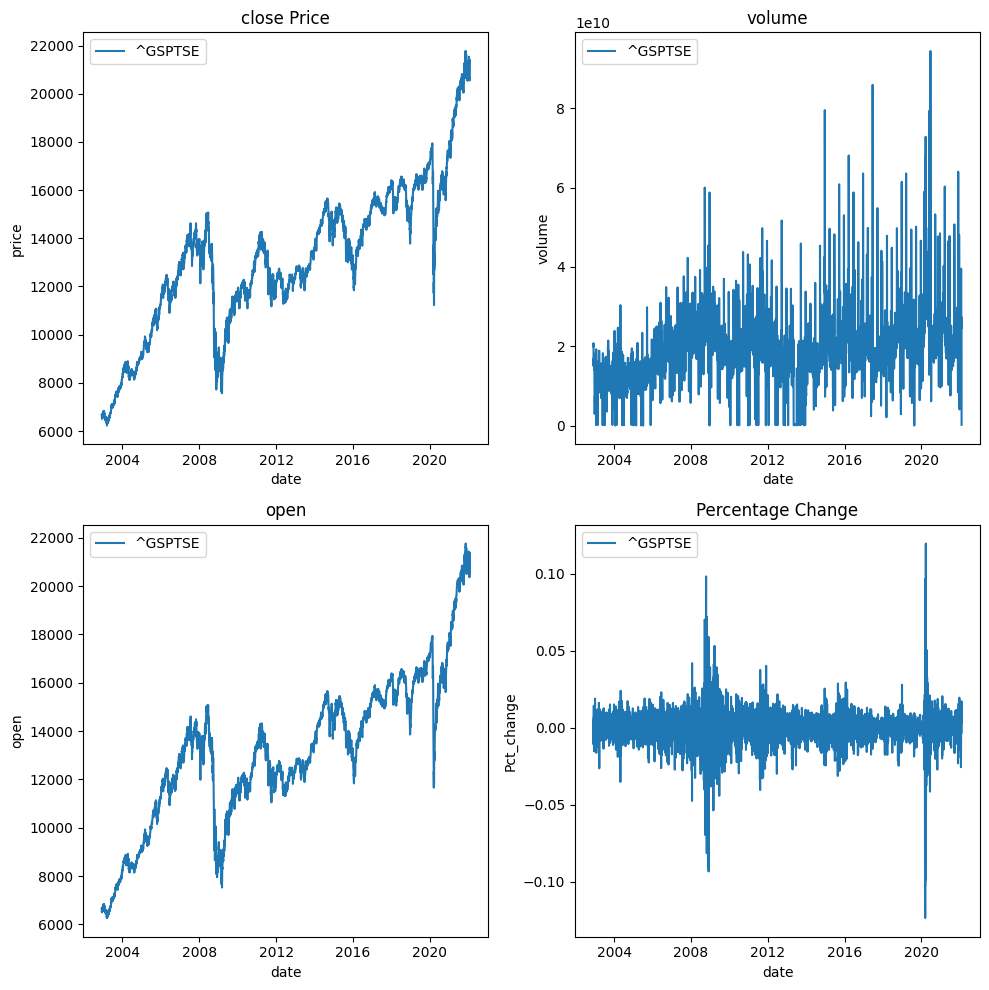

In [ ]:
# Import pandas and matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from a csv file
data = pd.read_csv("/content/drive/MyDrive/YF-GSPTSE.csv")

# Convert the Date column to datetime objects
data["date"] = pd.to_datetime(data["date"])

# Calculate the percentage change in the close price for each row
data["Pct_change"] = data["close"].pct_change()

# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot the close price for each company in the first subplot
axes[0, 0].plot(data["date"], data["close"])
axes[0, 0].set_title("close Price")
axes[0, 0].set_xlabel("date")
axes[0, 0].set_ylabel("price")
axes[0, 0].legend(data["ticker"].unique())

# Plot the volume for each company in the second subplot
axes[0, 1].plot(data["date"], data["volume"])
axes[0, 1].set_title("volume")
axes[0, 1].set_xlabel("date")
axes[0, 1].set_ylabel("volume")
axes[0, 1].legend(data["ticker"].unique())

# Plot the dividends for each company in the third subplot
axes[1, 0].plot(data["date"], data["open"])
axes[1, 0].set_title("open")
axes[1, 0].set_xlabel("date")
axes[1, 0].set_ylabel("open")
axes[1, 0].legend(data["ticker"].unique())

# Plot the percentage change for each company in the fourth subplot
axes[1, 1].plot(data["date"], data["Pct_change"])
axes[1, 1].set_title("Percentage Change")
axes[1, 1].set_xlabel("date")
axes[1, 1].set_ylabel("Pct_change")
axes[1, 1].legend(data["ticker"].unique())

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the figure
plt.show()
